## Introdução

#### Contextualização
Para confirmar a Teoria da Relatividade Geral de Einstein, foram feitas duas expedições durante o eclipse solar de 29 de maio de 1919, visando observar o deslocamento angular de estrelas próximas ao sol devido ao desvio da luz emitida por estas causado pela influência gravitacional do sol. Nesse contexto, foi medido o deslocamento de 1,98 arcseg para uma destas estrelas próximas ao sol durante o eclipse, sendo que, segundo a proposta de Einstein, tal desvio devia ser de 1,75 arcseg.

#### Levantando hipóteses
Seguindo a teoria proposta por Einstein, podemos levantas as seguintes hipóteses nula e alternativa:

* Hipótese Nula ($H_0$): o deslocamento angular é de 1,75 arcseg para estrelas que estivessem perto do Sol durante o eclipse.

* Hipótese Alternativa ($H_1$): o deslocamento angular é diferente do previsto por Einstein.

Além disso, sabemos que o deslocamento angular medido durante o eclipse de 1919 foi de 1,98 arcseg.

#### Teste de hipótese
Para testar a hipótese definida por Einstein, consideraremos que o valor esperado para o deslocamento angular segue uma distribuição normal com média 1,5 e variância 0,02. Assim, simulamos um experimento q mede o  deslocamento de 1000000 de estrelas seguindo esse comportamento, visando calcular o p-valor do modelo com a estatística observada para rejeitar ou não a hipótese de Einstein.

## Metodologia

In [1]:
import random
import seaborn as sns

Primeiramente, definimos o nível de confiança usual de 95%, e , junto com ele, a significância do modelo que desejamos simular:

In [2]:
NIVEL_CONFIANCA = 0.95

significancia = 1 - NIVEL_CONFIANCA

Feito isso, é necessário definir a estatística de teste a ser utilizada. Aqui, escolhemos utilizar o próprio deslocamento angular medido para a estrela observada. Sabemos que este valor segue uma distibuição normal de média 1,75 arcseg com variância de 0,02 arcseg. Calcularemos também o desvio padrão - raíz quadrada da variância - para definir o comportamento do modelo. Por fim, conhecemos o valor da estatística observada: 1,98 arcseg. Salvaremos todos esses valores em variáveis para utilizá-los na simulação do deslocamento angular observada para uma estrela durante o eclipse solar de maio de 1919 para 1000000 universos paralelos diferentes, a fim de testar a hipótese proposta por Einstein.

In [3]:
MEDIA = 1.75
VARIANCIA = 0.02
DESV_PADRAO = VARIANCIA**(1/2)

ESTATISTICA_OBSERVADA = 1.98

Tendo definido o comportamento do modelo, faremos uma simulação para o deslocamento angular da estrela usando a função `random.gauss`, que sorteia valores em uma distribuição gaussiana. Primeiramente, definimos a simulação de uma estrela e, em seguida, defiminimos o experimento para $n$ repetições. Aqui, utilizamos $n=1000000$.

In [4]:
def sorteia_gauss(MEDIA, DESV_PADRAO): 
    angulo_estrela = random.gauss (MEDIA, DESV_PADRAO)
    return angulo_estrela

def experimento(MEDIA, DESV_PADRAO, NUM_REPETICOES):
    resultado = []
    for n in range (NUM_REPETICOES):
        angulo_estrela = sorteia_gauss(MEDIA,DESV_PADRAO)
        resultado.append(angulo_estrela)
    return resultado

NUM_REPETICOES = 1000000

resultado = experimento(MEDIA, DESV_PADRAO, NUM_REPETICOES)

Salvando o resultado obtido numa variável `resultados`, podemos plotar um histograma que apresenta os valores obtidos no experimento. Plotamos, no mesmo gráfico, o valor da estatística observada e do valor previsto por Einstein (e média do modelo normal).

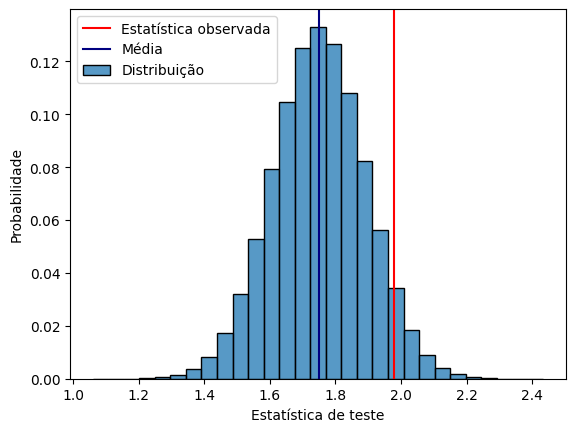

In [5]:
eixo = sns.histplot(
    resultado,
    stat="probability",
    bins=29,
    label="Distribuição",
)
eixo.axvline(ESTATISTICA_OBSERVADA, label="Estatística observada", color="red")

eixo.axvline(MEDIA, label="Média", color="navy")

eixo.set(xlabel="Estatística de teste", ylabel="Probabilidade")
eixo.legend();

Como nossa estatística de teste apresenta uma distribuição bicaudal - direcionada para estíticas de teste tanto maiores quanto menores que o previsto, ambas consideradas na nossa $H_1$ -, calcularemos também a contraparte simétrica da estatística observada para testar a hipótese. Esta é igualmente contrária a $H_0$, entretanto oposta à estatística observada, logo é calculada como $|E_{\mathrm prev} - E_{\mathrm obs}|$. Plotamos a contraparte simétrica no mesmo histograma a fim de facilitar a visualização.

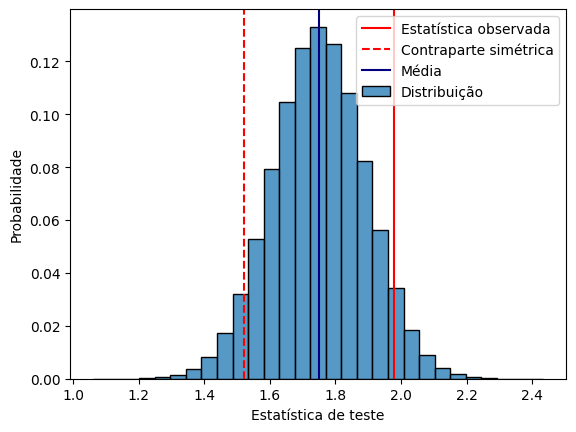

In [6]:
ponto_central = MEDIA

diferenca = abs(ponto_central - ESTATISTICA_OBSERVADA)

if ESTATISTICA_OBSERVADA < ponto_central:
    contraparte_simetrica = ponto_central + diferenca
elif ESTATISTICA_OBSERVADA > ponto_central:
    contraparte_simetrica = ponto_central - diferenca
else:
    contraparte_simetrica = estatistica_observada

eixo = sns.histplot(
    resultado,
    stat="probability",
    bins=29,
    label="Distribuição",
)
eixo.axvline(ESTATISTICA_OBSERVADA, label="Estatística observada", color="red")

eixo.axvline(
    contraparte_simetrica,
    label="Contraparte simétrica",
    color="red",
    ls="--",
)

eixo.axvline(MEDIA, label="Média", color="navy")

eixo.set(xlabel="Estatística de teste", ylabel="Probabilidade")
eixo.legend();

Tendo definido nossa simulação, a estatítica de teste, a estatítica observada e sua contraparte simétrica, podemos testar a hipótese de Einstein calculando seu p-valor. Para isso, computaremos todas as ocasiões que a simulação apresentou valores maior ou igual a estatística de teste (visto que ela é maior que a média) e menor ou igual que sua contraparte simétrica e dividiremos a contagem encontrada pelo total de repetições realizada no experimento - no caso, 1000000. Caso o p-valor seja menor que a significância, devemos rejeitar $H_0$, caso contrário, falhamos em rejeitar $H_0$. Assim:

In [7]:
def testa_hipotese_bicaudal(
    resultado_simulacao,
    estatistica_observada,
    contraparte_simetrica,
    significancia,
):
    contador = 0

    for res in resultado_simulacao:
        if (res >= estatistica_observada) or (res <= contraparte_simetrica):
            contador += 1

    pvalor = contador / len(resultado_simulacao)

    print("p-valor =", pvalor)

    print()

    if pvalor < significancia:
        print("Conclusão do teste de hipótese: devemos rejeitar H0")
    else:
        print("Conclusão do teste de hipótese: não devemos rejeitar H0")

    return pvalor


pvalor = testa_hipotese_bicaudal(
    resultado, ESTATISTICA_OBSERVADA, contraparte_simetrica, significancia
)

p-valor = 0.103945

Conclusão do teste de hipótese: não devemos rejeitar H0


## Conclusões
Observando o histograma plotado, é possível identificar que , apesar da grande maiora das simulações estarem entre a contra parte simétrica e a estatística observada, há uma quantia considerada de ocorrências abaixo da contraparte simétrica e acima da estatística observada - o que é confirmado pelo p-valor de 10%. Desse modo, como a siginificância definida foi de 5%, **falhamos em rejeitar $H_0$**, logo, podemos **confirmar a Teoria da Relatividade Geral de Einstein**.

### Agradecimentos
Agradeço, especialmente, à Maria Emily Gomes, que auxiliou no entendimento da proposta e da construção do projeto.

### Referências

CASSAR, DR. LMA-203 9.0 Teste de hipótese - introdução com simulação. Microsoft Teams, T03-LMA-203 - Probabilidade e Estatística, Material de Aula. 

CASSAR, DR. LMA-203 10.0 - Testando mais hipóteses com simulações. Microsoft Teams, T03-LMA-203 - Probabilidade e Estatística, Material de Aula. 

Documentação Python. Python 3. Bibliotecas padrão: random. Disponível em: https://docs.python.org/3/library/random.html. Acesso em: 30 out. 2024.